# Apriori Algorithm

- for finding frequent itemset in datasets

### What is frequent itemset ?

<p> - Frequent itemsets are those items whise supports is greater than is <b>threshold</b> value or user-specifired minimum suppport. </p>

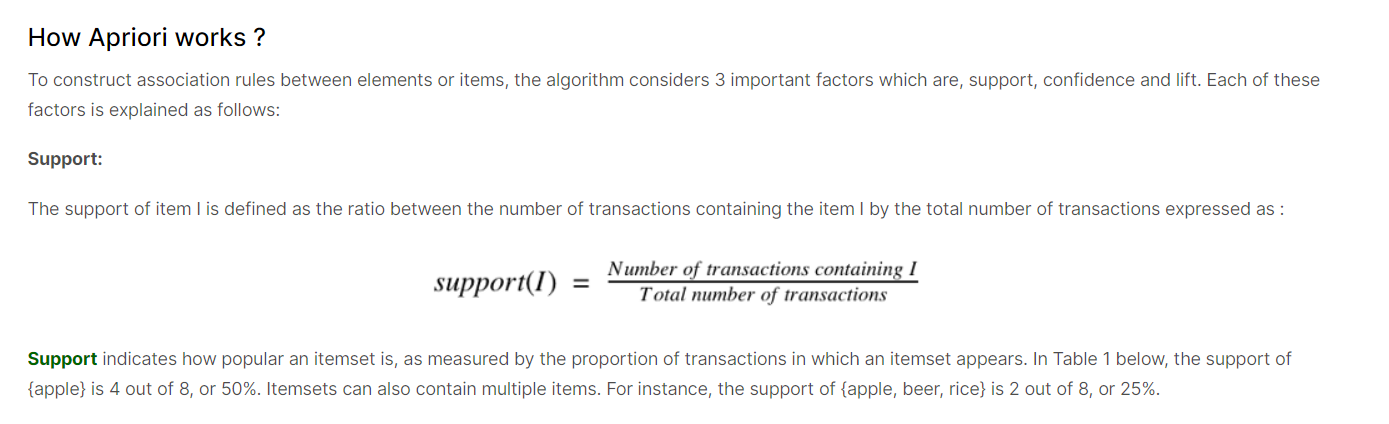

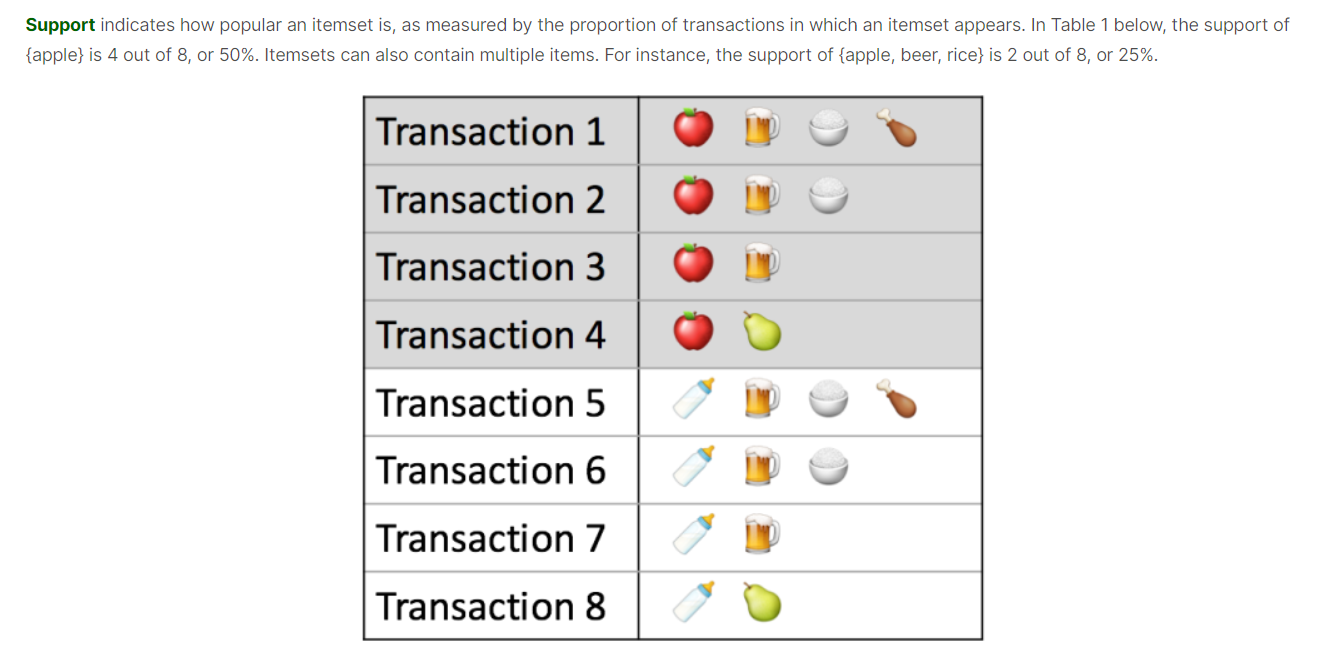

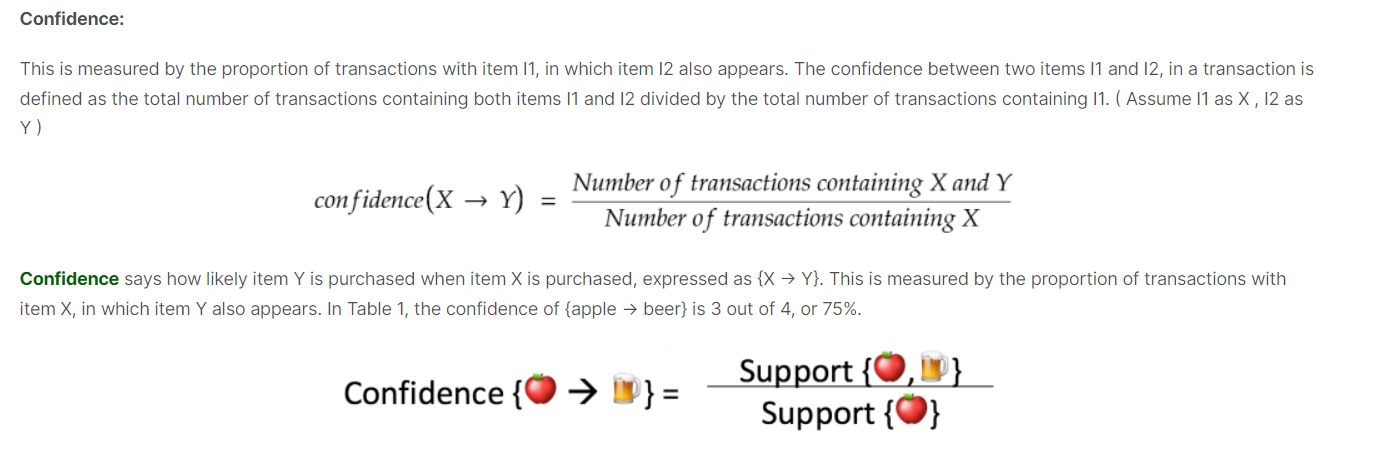

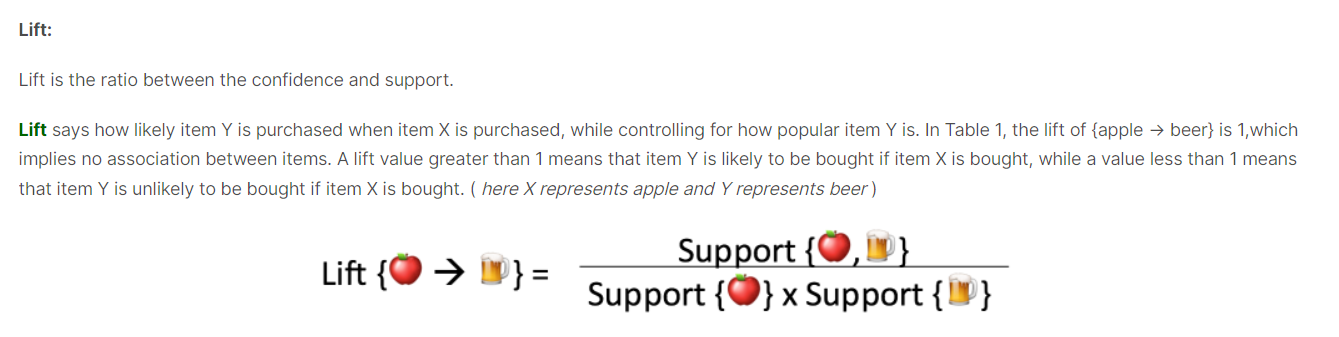

### Association Rules

- sup ( A ^ B ) / A

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [4]:
df.fillna(0,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
transactions = []

for i in range(1,20):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

In [6]:
df1 = pd.DataFrame(transactions)
df1.fillna("",inplace=True)
df1

,0,1,2,3,4,5,6,7,8,9
0,burgers,meatballs,eggs,,,,,,,
1,chutney,,,,,,,,,
2,turkey,avocado,,,,,,,,
3,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,
4,low fat yogurt,,,,,,,,,
5,whole wheat pasta,french fries,,,,,,,,
6,soup,light cream,shallot,,,,,,,
7,frozen vegetables,spaghetti,green tea,,,,,,,
8,french fries,,,,,,,,,
9,eggs,pet food,,,,,,,,


In [7]:
df1.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [8]:
pd.unique(list(transactions))

TypeError: unhashable type: 'list'

In [18]:
 def aprioriFun(trans_data,supp=3, con=0.5):
    freq = pd.DataFrame()
    df = count_item(trans_data)
    i = 1;
    while(len(df) != 0):
        df = prune(df, supp)

        if len(df) > 1 or (len(df) == 1 and int(df.supp_count >= supp)):
            freq = df

        itemsets = join(df.item_sets)

        if(itemsets is None):
            return freq

        df = count_itemset(trans_data, itemsets)
        i = i + 1
    return df

def prune(data,supp):    
    df = data[data.supp_count >= supp] 
    return df

def count_itemset(transaction_df, itemsets):    
    count_item = {}
    for item_set in itemsets:
        set_A = set(item_set)
        for row in trans_df:
            set_B = set(row)

            if set_B.intersection(set_A) == set_A: 
                if item_set in count_item.keys():
                    count_item[item_set] += 1

                else:
                    count_item[item_set] = 1

    data = pd.DataFrame()
    data['item_sets'] = count_item.keys()
    data['supp_count'] = count_item.values()

    return data

def count_item(trans_items):    
    count_ind_item = {}
    for row in trans_items:
        for i in range(len(row)):
            if row[i] in count_ind_item.keys():
                count_ind_item[row[i]] += 1
            else:
                count_ind_item[row[i]] = 1

    data = pd.DataFrame()
    data['item_sets'] = count_ind_item.keys()
    data['supp_count'] = count_ind_item.values()
    data = data.sort_values('item_sets')
    return data

def join(list_of_items):
    itemsets = []
    i = 1
    for entry in list_of_items:
        proceding_items = list_of_items[i:]
        for item in proceding_items:
            if(type(item) is str):
                if entry != item:
                    tuples = (entry, item)
                    itemsets.append(tuples)
            else:
                if entry[0:-1] == item[0:-1]:
                    tuples = entry+item[1:]
                    itemsets.append(tuples)
        i = i+1
    if(len(itemsets) == 0):
        return None
    return itemsets

In [19]:
df = pd.read_csv("GroceryStoreDataSet.csv", names=['Products'])
trans_df = df.Products.str.split(',')
freq_item_sets = aprioriFun(trans_df, 4)
freq_item_sets

,item_sets,supp_count
0,"(BISCUIT, BREAD)",4
14,"(BREAD, MILK)",4
15,"(BREAD, SUGER)",4
16,"(BREAD, TEA)",4
17,"(COFFEE, CORNFLAKES)",4
19,"(COFFEE, SUGER)",4
26,"(MAGGI, TEA)",4


In [7]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder 

In [8]:
store=pd.read_csv('GroceryStoreDataSet.csv',names=['product'],header=None)

In [9]:
store.head()

,product
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [10]:
store=list(store['product'].apply(lambda x: x.split(",")))

In [11]:
store

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [12]:
te=TransactionEncoder()
store_ap=te.fit(store).transform(store)

In [13]:
store_ap=pd.DataFrame(store_ap,columns=te.columns_)
store_ap

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [14]:
from mlxtend.frequent_patterns import apriori
frequent_item=apriori(store_ap,min_support=0.15,use_colnames=True)
frequent_item  

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
5,0.30,(CORNFLAKES)
6,0.25,(MAGGI)
7,0.25,(MILK)
8,0.30,(SUGER)
9,0.35,(TEA)


In [15]:
from mlxtend import frequent_patterns
from mlxtend.frequent_patterns import association_rules
store_association=association_rules(frequent_item,metric="lift",min_threshold=0.8)
store_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BREAD),(BISCUIT),0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889
1,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000
3,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571,0.0450,1.225000
4,(BREAD),(BOURNVITA),0.65,0.20,0.15,0.230769,1.153846,0.0200,1.040000
5,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000
6,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000
7,(BREAD),(MAGGI),0.65,0.25,0.15,0.230769,0.923077,-0.0125,0.975000
8,(BREAD),(MILK),0.65,0.25,0.20,0.307692,1.230769,0.0375,1.083333
9,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000


In [16]:
store_association.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [17]:
store_association_new=store_association[['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift']]

In [18]:
store_association_new

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(BREAD),(BISCUIT),0.65,0.35,0.20,0.307692,0.879121
1,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571
3,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571
4,(BREAD),(BOURNVITA),0.65,0.20,0.15,0.230769,1.153846
5,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846
6,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077
7,(BREAD),(MAGGI),0.65,0.25,0.15,0.230769,0.923077
8,(BREAD),(MILK),0.65,0.25,0.20,0.307692,1.230769
9,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769


In [19]:
store_association_new2=store_association_new[store_association_new['lift']>=1]

store_association_new2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571
3,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571
4,(BREAD),(BOURNVITA),0.65,0.20,0.15,0.230769,1.153846
5,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846
8,(BREAD),(MILK),0.65,0.25,0.20,0.307692,1.230769
9,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769
10,(BREAD),(SUGER),0.65,0.30,0.20,0.307692,1.025641
11,(SUGER),(BREAD),0.30,0.65,0.20,0.666667,1.025641
14,(COCK),(COFFEE),0.15,0.40,0.15,1.000000,2.500000
15,(COFFEE),(COCK),0.40,0.15,0.15,0.375000,2.500000


### Support(mineral water)

In [65]:
def support(lst):
    total_transaction_ouccured = 0;
    total_transaction = 0

    for spt in lst:
        total_transaction_ouccured = 0
        for i in range(1,len(df1)):
            total_transaction = 0
            for j in range(0,10):
                if(df.values[i,j] != 0 and df.values[i,j] == spt):
                    total_transaction_ouccured = total_transaction_ouccured + 1;
                    break
            total_transaction = total_transaction + 1  
        support = round((total_transaction_ouccured / total_transaction) * 100,2)
        print("Support({3}) = {0} / {1} = {2}%".format(total_transaction_ouccured,total_transaction,support,spt))

        

In [66]:
lst = ["burgers","mineral water","chutney","turkey","low fat yogurt","whole wheat pasta","soup","eggs"]
support(lst)

Support(burgers) = 2 / 1 = 200.0%
Support(mineral water) = 5 / 1 = 500.0%
Support(chutney) = 1 / 1 = 100.0%
Support(turkey) = 4 / 1 = 400.0%
Support(low fat yogurt) = 2 / 1 = 200.0%
Support(whole wheat pasta) = 1 / 1 = 100.0%
Support(soup) = 1 / 1 = 100.0%
Support(eggs) = 5 / 1 = 500.0%


# new One

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('GroceryStoreDataSet.csv',names=['Products'])
df.head()

,Products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [6]:
trans_df = df.Products.str.split(',')
trans_df

0                  [MILK, BREAD, BISCUIT]
1      [BREAD, MILK, BISCUIT, CORNFLAKES]
2                 [BREAD, TEA, BOURNVITA]
3               [JAM, MAGGI, BREAD, MILK]
4                   [MAGGI, TEA, BISCUIT]
5                 [BREAD, TEA, BOURNVITA]
6                [MAGGI, TEA, CORNFLAKES]
7            [MAGGI, BREAD, TEA, BISCUIT]
8                [JAM, MAGGI, BREAD, TEA]
9                           [BREAD, MILK]
10    [COFFEE, COCK, BISCUIT, CORNFLAKES]
11    [COFFEE, COCK, BISCUIT, CORNFLAKES]
12             [COFFEE, SUGER, BOURNVITA]
13                  [BREAD, COFFEE, COCK]
14                [BREAD, SUGER, BISCUIT]
15            [COFFEE, SUGER, CORNFLAKES]
16              [BREAD, SUGER, BOURNVITA]
17                 [BREAD, COFFEE, SUGER]
18                 [BREAD, COFFEE, SUGER]
19        [TEA, MILK, COFFEE, CORNFLAKES]
Name: Products, dtype: object